In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'D:\Uni work\Engineering Mathematics Work\MDM3\Sky broadband\2019-ISP-Broadband-performance-data.csv')
#print(df)
df.info()

C:\Users\Pablo GDT\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pablo GDT\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Pablo GDT\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unit_id                            3465 non-null   int64  
 1   ISP                                3465 non-null   object 
 2   Technology                         3465 non-null   object 
 3   PACKAGE (download by upload)       3465 non-null   int64  
 4   Distance from exchange - DSL only  338 non-null    object 
 5   MarketClass                        3465 non-null   object 
 6   Region                             3465 non-null   object 
 7   Country                            3465 non-null   object 
 8   Geography                          3465 non-null   object 
 9   Download - 24 (ave)                3465 non-null   float64
 10  Download - 24 min(ave)             3465 non-null   float64
 11  Download - 24 max (ave)            3465 non-null   float

In [4]:
modDf= df.dropna(subset=["Web loading - 24h","NetflixUHD24hr"])

In [5]:
modDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3446
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unit_id                            3054 non-null   int64  
 1   ISP                                3054 non-null   object 
 2   Technology                         3054 non-null   object 
 3   PACKAGE (download by upload)       3054 non-null   int64  
 4   Distance from exchange - DSL only  338 non-null    object 
 5   MarketClass                        3054 non-null   object 
 6   Region                             3054 non-null   object 
 7   Country                            3054 non-null   object 
 8   Geography                          3054 non-null   object 
 9   Download - 24 (ave)                3054 non-null   float64
 10  Download - 24 min(ave)             3054 non-null   float64
 11  Download - 24 max (ave)            3054 non-null   float

In [6]:

modDf2= modDf.dropna(subset=["Web loading - 24h","NetflixUHD24hr"])
modDf2.drop(["MarketClass","rural_weight","Natweight"], axis=1, inplace=True)

modDf2.head(200)

,unit_id,ISP,Technology,PACKAGE (download by upload),Distance from exchange - DSL only,Region,Country,Geography,Download - 24 (ave),Download - 24 min(ave),...,iPlayerHD24hr,iPlayerSD24hr,iPlayerFailed24hr,iPlayerStartupDelay24hr,iPlayerUHDPeak,iPlayerHDPeak,iPlayerSDPeak,iPlayerFailedPeak,iPlayerStartupDelayPeak,isp_wghts
0,941318,Virgin,Cable,100,NaN,Scotland,Scotland,Urban,110.24,100.78,...,100.00%,0.00%,0.00%,802.71,0.00%,100.00%,0.00%,0.00%,771.44,1.000000
1,1323,Plusnet,FTTC,76,NaN,London,England,Urban,65.53,62.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880000
2,22074685,KCOM,FTTP,30,NaN,Yorkshire & Humberside,England,Urban,30.36,28.05,...,100.00%,0.00%,0.00%,1079.39,NaN,NaN,NaN,NaN,NaN,1.000000
3,1360,Sky,ADSL2,11,2251 to 2500m,North West,England,Rural,5.91,4.17,...,92.48%,7.52%,0.00%,3082.76,0.00%,91.67%,8.33%,0.00%,3320.73,1.633333
4,813667,Plusnet,ADSL1,8,2001 to 2250m,South East,England,Rural,1.52,1.20,...,0.00%,100.00%,0.00%,3553.32,0.00%,0.00%,100.00%,0.00%,3665.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,15147,TalkTalk,FTTC,38,NaN,Scotland,Scotland,Urban,37.13,34.02,...,100.00%,0.00%,0.00%,899.60,0.00%,100.00%,0.00%,0.00%,993.55,0.950000
201,14248,Plusnet,FTTC,76,NaN,North West,England,Urban,60.91,38.52,...,100.00%,0.00%,0.00%,926.44,0.00%,100.00%,0.00%,0.00%,967.30,0.880000
202,5220561,Plusnet,ADSL2,17,601 to 700m,North East,England,Urban,10.58,8.70,...,98.81%,1.19%,0.00%,2043.84,NaN,NaN,NaN,NaN,NaN,0.675000
203,14288,KCOM,FTTC,75,NaN,Yorkshire & Humberside,England,Urban,40.16,35.60,...,100.00%,0.00%,0.00%,742.96,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
modDf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3446
Data columns (total 75 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unit_id                            3054 non-null   int64  
 1   ISP                                3054 non-null   object 
 2   Technology                         3054 non-null   object 
 3   PACKAGE (download by upload)       3054 non-null   int64  
 4   Distance from exchange - DSL only  338 non-null    object 
 5   Region                             3054 non-null   object 
 6   Country                            3054 non-null   object 
 7   Geography                          3054 non-null   object 
 8   Download - 24 (ave)                3054 non-null   float64
 9   Download - 24 min(ave)             3054 non-null   float64
 10  Download - 24 max (ave)            3054 non-null   float64
 11  Download - peak (ave)              3054 non-null   float

In [8]:
modDf2["Distance from exchange - DSL only"].fillna(value = "not DSL",inplace= True)
numerical_modDf= modDf2.loc[:,"Download - 24 (ave)":]
cat_modDf=modDf2.loc[:,:"Geography"]

print(cat_modDf)

       unit_id      ISP Technology  PACKAGE (download by upload)  \
0       941318   Virgin      Cable                           100   
1         1323  Plusnet       FTTC                            76   
2     22074685     KCOM       FTTP                            30   
3         1360      Sky      ADSL2                            11   
4       813667  Plusnet      ADSL1                             8   
...        ...      ...        ...                           ...   
3333   5072065     KCOM       FTTP                            75   
3426   5071997     KCOM       FTTP                            30   
3440   5072121     KCOM       FTTC                            75   
3441   5072181     KCOM       FTTC                            75   
3446   5220505     KCOM      ADSL2                            20   

     Distance from exchange - DSL only                  Region   Country  \
0                              not DSL                Scotland  Scotland   
1                              

In [9]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy= "mean")


In [10]:

numerical_modDf["DNS Failure 24hr"] = numerical_modDf["DNS Failure 24hr"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["DNS Failure peak"] = numerical_modDf["DNS Failure peak"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["Packet Loss - 24h"] = numerical_modDf["Packet Loss - 24h"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["Packet Loss - peak"] = numerical_modDf["Packet Loss - peak"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeUHD24hr"] = numerical_modDf["YouTubeUHD24hr"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["YouTubeHD24hr"] = numerical_modDf["YouTubeHD24hr"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeSD24hr"] = numerical_modDf["YouTubeSD24hr"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["YouTubeHDPeak"] = numerical_modDf["YouTubeHDPeak"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeSDPeak"] = numerical_modDf["YouTubeSDPeak"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["YouTubeFailed24hr"] = numerical_modDf["YouTubeFailed24hr"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeUHDPeak"]=   numerical_modDf["YouTubeUHDPeak"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["YouTubeFailedPeak"]=   numerical_modDf["YouTubeFailedPeak"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixUHD24hr"]=   numerical_modDf["NetflixUHD24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixHD24hr"]=   numerical_modDf["NetflixHD24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixSD24hr"]=   numerical_modDf["NetflixSD24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixFailed24hr"]=   numerical_modDf["NetflixFailed24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixUHDPeak"]=   numerical_modDf["NetflixUHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["NetflixHDPeak"]=   numerical_modDf["NetflixHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["NetflixSDPeak"]=   numerical_modDf["NetflixSDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["NetflixFailedPeak"]=   numerical_modDf["NetflixFailedPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerUHD24hr"]=   numerical_modDf["iPlayerUHD24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerHD24hr"]=   numerical_modDf["iPlayerHD24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerSD24hr"]=   numerical_modDf["iPlayerSD24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerFailed24hr"]=   numerical_modDf["iPlayerFailed24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerUHDPeak"]=   numerical_modDf["iPlayerUHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerHDPeak"]=   numerical_modDf["iPlayerHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerSDPeak"]=   numerical_modDf["iPlayerSDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerFailedPeak"]=   numerical_modDf["iPlayerFailedPeak"].str.rstrip('%').astype('float')/ 100


# etflixSDPeak               2738 non-null   object 
#  54  NetflixFailedPeak           2738 non-null   object 
#  55  NetflixStartupDelayPeak     2738 non-null   float64
#  56  iPlayerUHD24hr              2951 non-null   object 
#  57  iPlayerHD24hr               2951 non-null   object 
#  58  iPlayerSD24hr               2951 non-null   object 
#  59  iPlayerFailed24hr           2951 non-null   object 
#  60  iPlayerStartupDelay24hr     2949 non-null   float64
#  61  iPlayerUHDPeak              2646 non-null   object 
#  62  iPlayerHDPeak               2646 non-null   object 
#  63  iPlayerSDPeak               2646 non-null   object 
#  64  iPlayerFailedPeak           2646 non-null   object 
# print(numerical_modDf["YouTubeFailed24hr"].head(20))

In [11]:
 numerical_modDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3446
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Download - 24 (ave)         3054 non-null   float64
 1   Download - 24 min(ave)      3054 non-null   float64
 2   Download - 24 max (ave)     3054 non-null   float64
 3   Download - peak (ave)       3054 non-null   float64
 4   Download - peak min(ave)    3054 non-null   float64
 5   Download - peak max (ave)   3054 non-null   float64
 6   Download - 0-6am            3043 non-null   float64
 7   Download - 6am-12am         3051 non-null   float64
 8   Download - 12-18pm          3053 non-null   float64
 9   Download - 18-19pm          3030 non-null   float64
 10  Download - 19-20pm          3054 non-null   float64
 11  Download - 20-21pm          3052 non-null   float64
 12  Download - 21-22pm          3054 non-null   float64
 13  Download - 22-23pm          3052 

In [12]:
imputer.fit(numerical_modDf)

SimpleImputer()

In [13]:
imputer.statistics_

array([7.83954388e+01, 6.80154715e+01, 8.15928978e+01, 7.71069319e+01,
       7.42584840e+01, 7.93528749e+01, 7.90403122e+01, 7.89402524e+01,
       7.84411562e+01, 7.79482211e+01, 7.77662443e+01, 7.72026704e+01,
       7.73582155e+01, 7.78660452e+01, 7.84568664e+01, 1.50618664e+01,
       1.43937852e+01, 1.52654977e+01, 1.49677963e+01, 1.48212475e+01,
       1.50895776e+01, 1.09905043e-03, 1.28077931e-03, 1.65395743e+01,
       1.71581794e+01, 7.69800197e-01, 9.61870292e-01, 3.74772355e-01,
       5.60379954e-01, 1.53020203e+01, 1.59462868e+01, 1.28176162e-03,
       1.23804846e-03, 3.23464475e+02, 3.46927704e+02, 4.46039961e-01,
       9.78551069e-03, 9.33423108e-01, 5.67934510e-02, 0.00000000e+00,
       9.17555175e+02, 6.45210148e-05, 9.44834229e-01, 5.51017418e-02,
       0.00000000e+00, 8.92941268e+02, 8.74637656e-01, 1.08360118e-01,
       1.62661428e-02, 7.35789129e-04, 1.00952421e+03, 8.74552374e-01,
       1.10430058e-01, 1.41910153e-02, 8.26186998e-04, 1.08135131e+03,
      

In [14]:
numerical_modDf.mean().values

array([7.83954388e+01, 6.80154715e+01, 8.15928978e+01, 7.71069319e+01,
       7.42584840e+01, 7.93528749e+01, 7.90403122e+01, 7.89402524e+01,
       7.84411562e+01, 7.79482211e+01, 7.77662443e+01, 7.72026704e+01,
       7.73582155e+01, 7.78660452e+01, 7.84568664e+01, 1.50618664e+01,
       1.43937852e+01, 1.52654977e+01, 1.49677963e+01, 1.48212475e+01,
       1.50895776e+01, 1.09905043e-03, 1.28077931e-03, 1.65395743e+01,
       1.71581794e+01, 7.69800197e-01, 9.61870292e-01, 3.74772355e-01,
       5.60379954e-01, 1.53020203e+01, 1.59462868e+01, 1.28176162e-03,
       1.23804846e-03, 3.23464475e+02, 3.46927704e+02, 4.46039961e-01,
       9.78551069e-03, 9.33423108e-01, 5.67934510e-02, 0.00000000e+00,
       9.17555175e+02, 6.45210148e-05, 9.44834229e-01, 5.51017418e-02,
       0.00000000e+00, 8.92941268e+02, 8.74637656e-01, 1.08360118e-01,
       1.62661428e-02, 7.35789129e-04, 1.00952421e+03, 8.74552374e-01,
       1.10430058e-01, 1.41910153e-02, 8.26186998e-04, 1.08135131e+03,
      

In [15]:
imputedDf= imputer.transform(numerical_modDf)

In [16]:
imputedDf= pd.DataFrame(imputedDf, columns=numerical_modDf.columns, index=numerical_modDf.index )

In [17]:
print(imputedDf)


      Download - 24 (ave)  Download - 24 min(ave)  Download - 24 max (ave)  \
0                  110.24                  100.78                   108.80   
1                   65.53                   62.78                    66.19   
2                   30.36                   28.05                    31.45   
3                    5.91                    4.17                     6.08   
4                    1.52                    1.20                     1.61   
...                   ...                     ...                      ...   
3333                79.03                   78.31                    79.15   
3426                31.38                   30.57                    31.47   
3440                70.33                   69.68                    70.42   
3441                74.10                   72.49                    74.51   
3446                 7.74                    7.37                     7.80   

      Download - peak (ave)  Download - peak min(ave)  \
0     

In [18]:


cat_modDf= cat_modDf.loc[:,"ISP":]
print(cat_modDf)

          ISP Technology  PACKAGE (download by upload)  \
0      Virgin      Cable                           100   
1     Plusnet       FTTC                            76   
2        KCOM       FTTP                            30   
3         Sky      ADSL2                            11   
4     Plusnet      ADSL1                             8   
...       ...        ...                           ...   
3333     KCOM       FTTP                            75   
3426     KCOM       FTTP                            30   
3440     KCOM       FTTC                            75   
3441     KCOM       FTTC                            75   
3446     KCOM      ADSL2                            20   

     Distance from exchange - DSL only                  Region   Country  \
0                              not DSL                Scotland  Scotland   
1                              not DSL                  London   England   
2                              not DSL  Yorkshire & Humberside   England   

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_1hot_encoded= cat_encoder.fit_transform(cat_modDf)
cat_1hot_encoded= cat_1hot_encoded.toarray()
columns= cat_modDf.columns
# print(columns)
feature_names= cat_encoder.get_feature_names(columns)
cat_1hot_encoded= pd.DataFrame(cat_1hot_encoded, columns= feature_names , index=cat_modDf.index )
print(cat_1hot_encoded)
#print(cat_encoder.categories_)


      ISP_A&A  ISP_BT  ISP_EE  ISP_Gigaclear  ISP_Hyperoptic  ISP_KCOM  \
0         0.0     0.0     0.0            0.0             0.0       0.0   
1         0.0     0.0     0.0            0.0             0.0       0.0   
2         0.0     0.0     0.0            0.0             0.0       1.0   
3         0.0     0.0     0.0            0.0             0.0       0.0   
4         0.0     0.0     0.0            0.0             0.0       0.0   
...       ...     ...     ...            ...             ...       ...   
3333      0.0     0.0     0.0            0.0             0.0       1.0   
3426      0.0     0.0     0.0            0.0             0.0       1.0   
3440      0.0     0.0     0.0            0.0             0.0       1.0   
3441      0.0     0.0     0.0            0.0             0.0       1.0   
3446      0.0     0.0     0.0            0.0             0.0       1.0   

      ISP_Origin Broadband  ISP_Plusnet  ISP_Post Office  ISP_Sky  ...  \
0                      0.0          0

In [20]:
from sklearn.preprocessing import MinMaxScaler
print(cat_1hot_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3446
Data columns (total 94 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ISP_A&A                                          3054 non-null   float64
 1   ISP_BT                                           3054 non-null   float64
 2   ISP_EE                                           3054 non-null   float64
 3   ISP_Gigaclear                                    3054 non-null   float64
 4   ISP_Hyperoptic                                   3054 non-null   float64
 5   ISP_KCOM                                         3054 non-null   float64
 6   ISP_Origin Broadband                             3054 non-null   float64
 7   ISP_Plusnet                                      3054 non-null   float64
 8   ISP_Post Office                                  3054 non-null   float64
 9   ISP_Sky                       

In [21]:
scaler = MinMaxScaler()
scaledDf=scaler.fit_transform(imputedDf)
scaledDf= pd.DataFrame(scaledDf, columns= imputedDf.columns , index=imputedDf.index )
print(scaledDf)

      Download - 24 (ave)  Download - 24 min(ave)  Download - 24 max (ave)  \
0                0.117292                0.110047                 0.115625   
1                0.069653                0.068495                 0.070254   
2                0.032179                0.030519                 0.033264   
3                0.006127                0.004407                 0.006250   
4                0.001449                0.001159                 0.001491   
...                   ...                     ...                      ...   
3333             0.084037                0.085477                 0.084054   
3426             0.033265                0.033274                 0.033285   
3440             0.074767                0.076040                 0.074758   
3441             0.078784                0.079113                 0.079113   
3446             0.008077                0.007906                 0.008082   

      Download - peak (ave)  Download - peak min(ave)  \
0     

In [22]:

clusterDf = pd.concat([cat_1hot_encoded,scaledDf],axis=1)
print(clusterDf)
print(clusterDf.columns)

      ISP_A&A  ISP_BT  ISP_EE  ISP_Gigaclear  ISP_Hyperoptic  ISP_KCOM  \
0         0.0     0.0     0.0            0.0             0.0       0.0   
1         0.0     0.0     0.0            0.0             0.0       0.0   
2         0.0     0.0     0.0            0.0             0.0       1.0   
3         0.0     0.0     0.0            0.0             0.0       0.0   
4         0.0     0.0     0.0            0.0             0.0       0.0   
...       ...     ...     ...            ...             ...       ...   
3333      0.0     0.0     0.0            0.0             0.0       1.0   
3426      0.0     0.0     0.0            0.0             0.0       1.0   
3440      0.0     0.0     0.0            0.0             0.0       1.0   
3441      0.0     0.0     0.0            0.0             0.0       1.0   
3446      0.0     0.0     0.0            0.0             0.0       1.0   

      ISP_Origin Broadband  ISP_Plusnet  ISP_Post Office  ISP_Sky  ...  \
0                      0.0          0

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X3D = pca.fit_transform(clusterDf)
#print(pca.components_.T[:,0])
#print(X3D)
explainedvariance= np.sum(pca.explained_variance_ratio_)*100
print(f"Explained variance is {explainedvariance}%" )



Explained variance is 96.72913859124083%


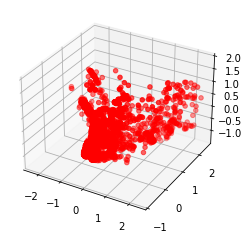

In [24]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X3D=pd.DataFrame(X3D)

ax.scatter(X3D.loc[:,0],X3D.loc[:,1],X3D.loc[:,2], c ='r', marker = 'o')


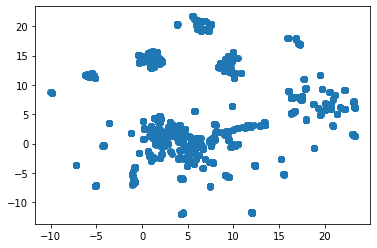

In [25]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X3D)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])

In [26]:

shrunkDf=clusterDf
shrunkDf.columns.to_series()

ISP_A&A                                    ISP_A&A
ISP_BT                                      ISP_BT
ISP_EE                                      ISP_EE
ISP_Gigaclear                        ISP_Gigaclear
ISP_Hyperoptic                      ISP_Hyperoptic
                                    ...           
iPlayerHDPeak                        iPlayerHDPeak
iPlayerSDPeak                        iPlayerSDPeak
iPlayerFailedPeak                iPlayerFailedPeak
iPlayerStartupDelayPeak    iPlayerStartupDelayPeak
isp_wghts                                isp_wghts
Length: 161, dtype: object

In [27]:
clusterFeatures = ['Download - peak (ave)',
'Download - peak min(ave)', 'Download - peak max (ave)', 'Upload - peak (ave)',
'Upload - peak min(ave)', 'Upload - peak max (ave)', 'DNS Rate - peak', 'Jitter-upstream - peak',
'Jitter-downtream - peak', 'Latency - peak', 'Web loading - peak','Disconnections',  'YouTubeStartupDelayPeak',
 'NetflixStartupDelayPeak', 'iPlayerStartupDelayPeak','ISP', 'Technology', 'Distance from exchange - DSL only', 'MarketClass',
'Region', 'Country', 'Geography','DNS Failure peak', 'Packet Loss - peak',
'YouTubeUHDPeak', 'YouTubeHDPeak', 'YouTubeSDPeak', 'YouTubeFailedPeak',
'NetflixUHDPeak', 'NetflixHDPeak', 'NetflixSDPeak', 'NetflixFailedPeak',
'iPlayerUHDPeak', 'iPlayerHDPeak', 'iPlayerSDPeak','iPlayerFailedPeak'] 
dropFeatures=set(scaledDf)-set(clusterFeatures)        
print (dropFeatures)
# shrunkDf= clusterDf
shrunkDf.drop(dropFeatures,axis=1,inplace=True)
#print(shrunkDf)


{'YouTubeSD24hr', 'NetflixHD24hr', 'iPlayerHD24hr', 'Download - 12-18pm', 'DNS Rate - 24h', 'Download - 24 max (ave)', 'Latency - 24h', 'NetflixSD24hr', 'Web loading - 24h', 'Upload - 24 min(ave)', 'NetflixFailed24hr', 'Download - 19-20pm', 'iPlayerStartupDelay24hr', 'Download - 0-6am', 'iPlayerFailed24hr', 'NetflixUHD24hr', 'Download - 6am-12am', 'Download - 22-23pm', 'Download - 24 (ave)', 'Upload - 24 max (ave)', 'iPlayerUHD24hr', 'Upload - 24 (ave)', 'YouTubeHD24hr', 'YouTubeStartupDelay24hr', 'Download - 18-19pm', 'Jitter-upstream - 24h', 'YouTubeUHD24hr', 'Download - 21-22pm', 'YouTubeFailed24hr', 'DNS Failure 24hr', 'Download - 20-21pm', 'Jitter-downstream - 24h', 'isp_wghts', 'Download - 23pm-00midnight', 'NetflixStartupDelay24hr', 'Packet Loss - 24h', 'Download - 24 min(ave)', 'iPlayerSD24hr'}


In [28]:
#df.columns.to_series().groupby(df.dtypes).groups
pca = PCA(n_components=35)
X3D = pca.fit_transform(shrunkDf)
#print(pca.components_.T[:,0])
xplainvar=np.cumsum(pca.explained_variance_ratio_)[-1]
print(xplainvar)

0.9503313762862404


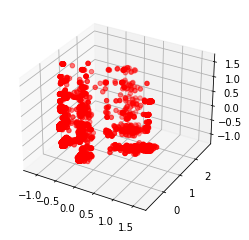

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X3D=pd.DataFrame(X3D)

ax.scatter(X3D.loc[:,0],X3D.loc[:,1],X3D.loc[:,2], c ='r', marker = 'o')

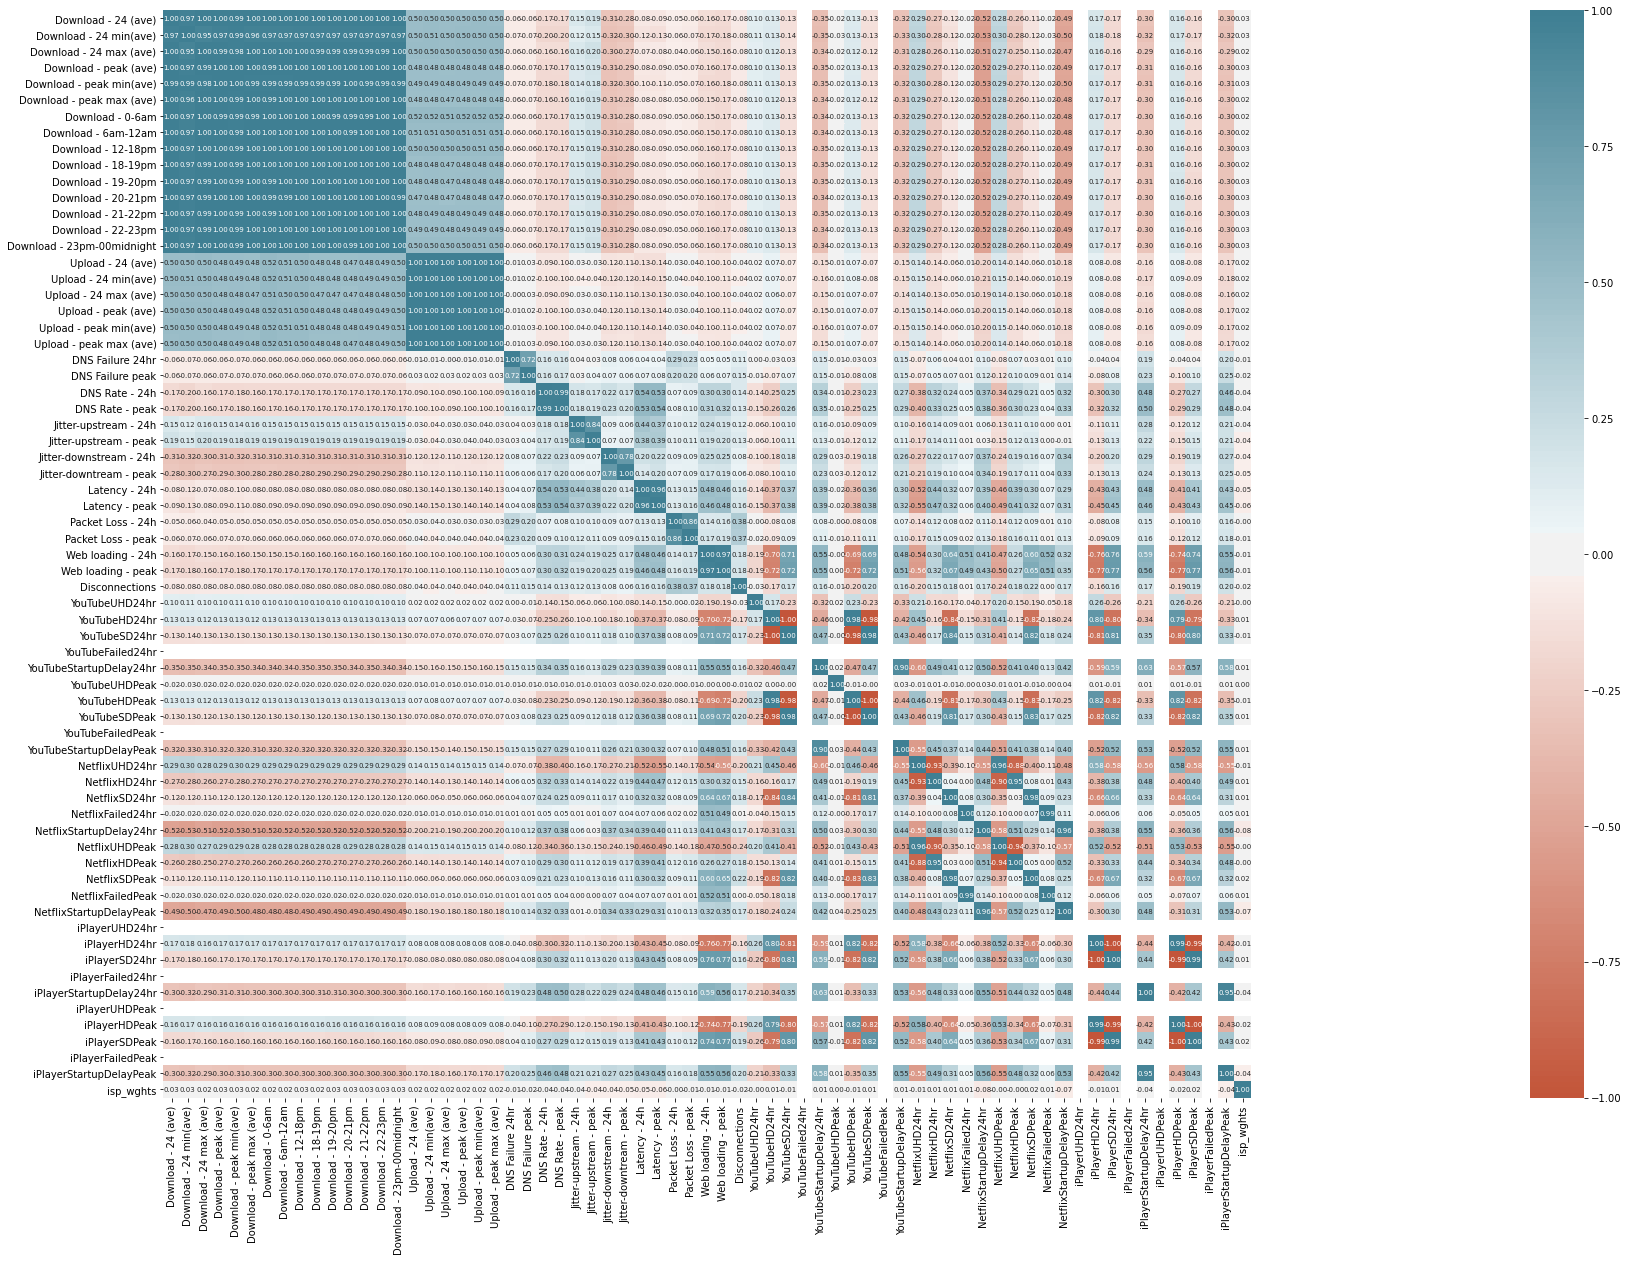

In [84]:
corr=numerical_modDf.corr()
#xvariables=['DNS Failure 24hr', 'DNS Failure peak', 'Packet Loss - 24h',
#         'Packet Loss - peak', 'YouTubeUHD24hr', 'YouTubeHD24hr',
#         'YouTubeSD24hr', 'YouTubeFailed24hr', 'YouTubeUHDPeak', 'YouTubeHDPeak',
#         'YouTubeSDPeak', 'YouTubeFailedPeak', 'NetflixUHD24hr', 'NetflixHD24hr',
#         'NetflixSD24hr', 'NetflixFailed24hr', 'NetflixUHDPeak', 'NetflixHDPeak',
#         'NetflixSDPeak', 'NetflixFailedPeak', 'iPlayerUHD24hr', 'iPlayerHD24hr',
#         'iPlayerSD24hr', 'iPlayerFailed24hr', 'iPlayerUHDPeak', 'iPlayerHDPeak',
#         'iPlayerSDPeak', 'iPlayerFailedPeak']
plt.subplots(figsize=(100,20))
sns.heatmap(corr, vmin=-1,annot= True,annot_kws={"size": 7},fmt='.2f',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [30]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
Xreduced = rbf_pca.fit_transform(X3D)

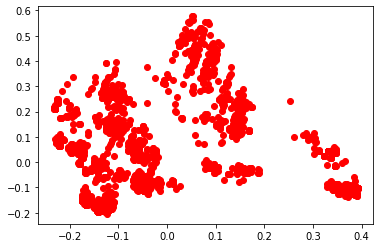

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xreduced[:,0],Xreduced[:,1], c ='r', marker = 'o')

In [32]:
linear_pca = KernelPCA(n_components=2, kernel="linear", gamma=0.04)
Xlinreduced = linear_pca.fit_transform(X3D)

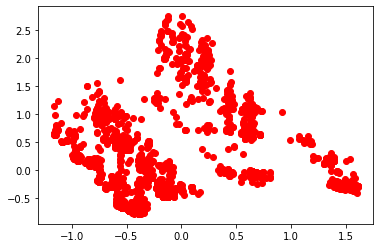

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xlinreduced[:,0],Xlinreduced[:,1], c ='r', marker = 'o')

In [34]:
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.04)
Xsigreduced = sig_pca.fit_transform(X3D)

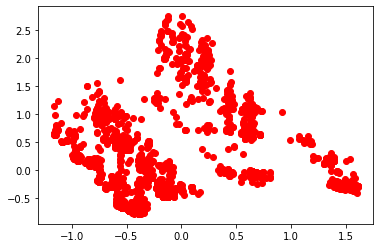

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xlinreduced[:,0],Xlinreduced[:,1], c ='r', marker = 'o')

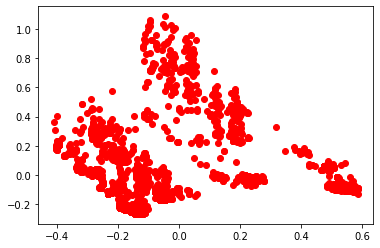

In [36]:
poly_pca = KernelPCA(n_components=2, kernel="poly", gamma=0.04)
Xpolyreduced = poly_pca.fit_transform(X3D)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xpolyreduced[:,0],Xpolyreduced[:,1], c ='r', marker = 'o')

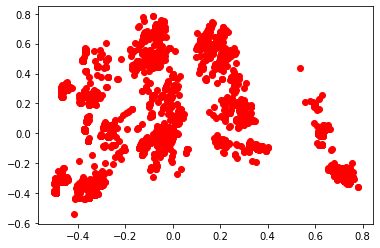

In [37]:
cosine_pca = KernelPCA(n_components=2, kernel="cosine", gamma=0.04)
Xcosinereduced = cosine_pca.fit_transform(X3D)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xcosinereduced[:,0],Xcosinereduced[:,1], c ='r', marker = 'o')

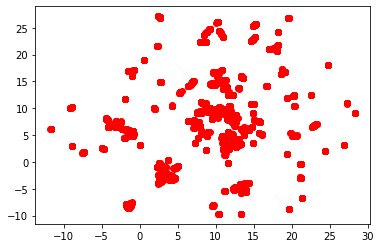

In [38]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X3D)
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(embedding[:,0],embedding[:,1], c ='r', marker = 'o')

In [63]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples = 5)
dbscan.fit(Xcosinereduced)


DBSCAN(eps=0.2)

Estimated number of clusters: 2
Estimated number of noise points: 1


Text(0.5, 1.0, 'DBSCAN')

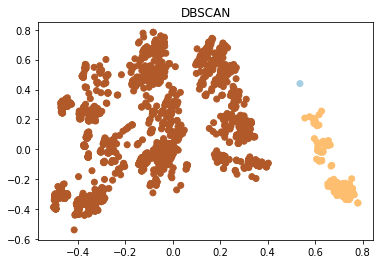

In [64]:
from sklearn import metrics

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

y_pred = dbscan.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

In [41]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, n_init=10)
gm.fit(Xcosinereduced)
print(gm.weights_)
print(gm.means_)
print(gm.converged_)
print(gm.n_iter_)

[0.32065493 0.16779292 0.26529413 0.24625802]
[[ 0.01012417  0.0136992 ]
 [ 0.70764524 -0.23188067]
 [-0.09596155  0.45308116]
 [-0.39197177 -0.34794625]]
True
4


Text(0.5, 1.0, 'Gaussian mixtures')

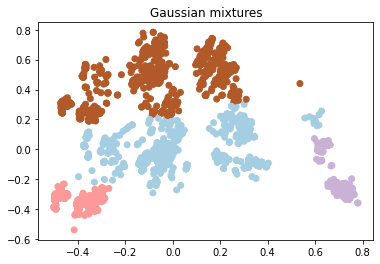

In [42]:
y_pred = gm.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred, cmap='Paired')
plt.title("Gaussian mixtures")

In [43]:
#print (sklearn.show_versions())


In [44]:
 import hdbscan
#hdbscan 

ModuleNotFoundError: No module named 'hdbscan'

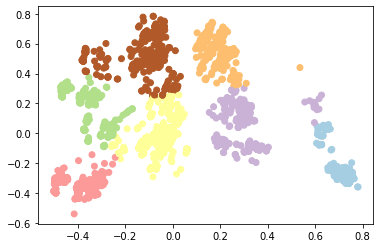

In [70]:
from sklearn.cluster import KMeans
#from sklearn.cluster import Kmeans
kmeans = KMeans(n_clusters=7, n_init=20)
y_pred = kmeans.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred, cmap='Paired')

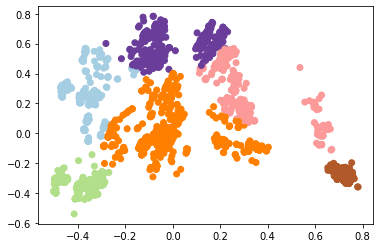

In [71]:
from sklearn.cluster import SpectralClustering
spectral=SpectralClustering(n_clusters=6)
y_pred= spectral.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred, cmap='Paired')